#### Name - Animesh Deb
#### Batch - DSBA_April_A_2021

#### Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.
2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

#### Problem 1B:

1. What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]
2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?
3. Explain the business implications of performing ANOVA for this particular case study.
 

#### Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?
2. Is scaling necessary for PCA in this case? Give justification and perform scaling.
3. Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].
4. Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]
5. Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]
6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features
7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]
8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import os
%matplotlib inline

import warnings
import os
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

warnings.filterwarnings("ignore")


In [2]:
pip install factor-analyzer


     |████████████████████████████████| 40 kB 3.5 MB/s eta 0:00:011
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=5ec3361e017398ef7d0b4bcae334775c7698ac06612d61c56133565a9a21281e
  Stored in directory: /home/jovyan/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


### Problem 1A:
Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

In [3]:
#importing the Dataset
path = os.getcwd()
file ='SalaryData.csv'
df=pd.read_csv(os.path.join(path,file))
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
pd.options.display.float_format = "{:,.5f}".format

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
df.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.00000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,"162,186.87500"
std,NaN,NaN,"64,860.40751"
min,NaN,NaN,"50,103.00000"
25%,NaN,NaN,"99,897.50000"
50%,NaN,NaN,"169,100.00000"
75%,NaN,NaN,"214,440.75000"


In [7]:
df.Education.unique()

array(['Doctorate', 'Bachelors', 'HS-grad'], dtype=object)

In [8]:
df.Occupation.unique()

array(['Adm-clerical', 'Sales', 'Prof-specialty', 'Exec-managerial'],
      dtype=object)

In [9]:
df.isnull().sum().any()

False

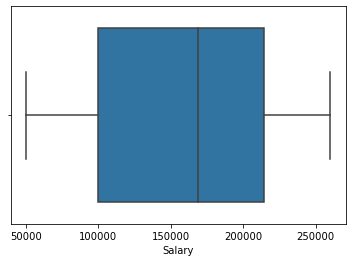

In [10]:
sns.boxplot(df['Salary'])

In [11]:
# Normality test in dataset using Shapiro test
# Ho = Data set is normally distributed
# Ha = Data set is not normally distributed

Edu1 = df[df['Education']=='Doctorate']['Salary']
Edu2 = df[df['Education']=='Bachelors']['Salary']
Edu3 = df[df['Education']=='HS-grad']['Salary']
Occ1 = df[df['Occupation']=='Adm-clerical']['Salary']
Occ2 = df[df['Occupation']=='Sales']['Salary']
Occ3 = df[df['Occupation']=='Prof-specialty']['Salary']
Occ4 = df[df['Occupation']=='Exec-managerial']['Salary']

In [12]:
print(f'{(ss.shapiro(Edu1))}')
print(f'{(ss.shapiro(Edu2))}')
print(f'{(ss.shapiro(Edu3))}')
print('--'*40)
print(f'{(ss.shapiro(Occ1))}')
print(f'{(ss.shapiro(Occ2))}')
print(f'{(ss.shapiro(Occ3))}')

ShapiroResult(statistic=0.8952829837799072, pvalue=0.0675690770149231)
ShapiroResult(statistic=0.9607304334640503, pvalue=0.7050924301147461)
ShapiroResult(statistic=0.885286271572113, pvalue=0.1783432960510254)
--------------------------------------------------------------------------------
ShapiroResult(statistic=0.9189430475234985, pvalue=0.34822404384613037)
ShapiroResult(statistic=0.8897128701210022, pvalue=0.11683973670005798)
ShapiroResult(statistic=0.736305832862854, pvalue=0.001313115586526692)


In [13]:
# As per Shapiro test almost all the levels under 2 factors follows normal distribution as pvalue is high.

In [14]:
# As checked, the dataset has no null values, there are 2 Categorical variables. Education has 3 levels and Occupation has 4 levels.

In [15]:
# Performing the Levene test to check the equality of variance
# Ho = have same variance
# Ha = one has diff variance
print(f'{ss.levene(Edu1, Edu2, Edu3)}')
print(f'{ss.levene(Occ1, Occ2, Occ3,Occ4)}')

LeveneResult(statistic=1.8800921605836554, pvalue=0.16686425699301183)
LeveneResult(statistic=2.4378177404396832, pvalue=0.0803790714975064)


In [16]:
# As per Levene test, the samples have same variances

#### 1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

##### 1. The null and alternate hypothesis for conducting one way ANOVA for education are as below :
##### Null Hypothesis, Ho = There are no effect of Education on Salary, mean of Salaries at different Education levels are same
##### Alternate Hypothesis, Ha = There is an effect of Education on Salary, mean of Salaries is different for at least one Education level
##### Ho : μ1 = μ2 = μ3 = ... = μn
##### Ha : μ1 != μ2 != μ3 != ... != μn
##### Level of Significance, α = 0.05

#####

##### 2. The null and alternate hypothesis for conducting one way ANOVA for Occupation are as below :
##### Null Hypothesis, Ho = There are no effect of Occupation on Salary, mean of Salaries at different Education levels are same
##### Alternate Hypothesis, Ha = There is an effect of Occupation on Salary, mean of Salaries is different for at least one Occupation level
##### Ho : μ1 = μ2 = μ3 = ... = μn
##### Ha : μ1 != μ2 != μ3 != ... != μn
##### Level of Significance, α = 0.05

#### 2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

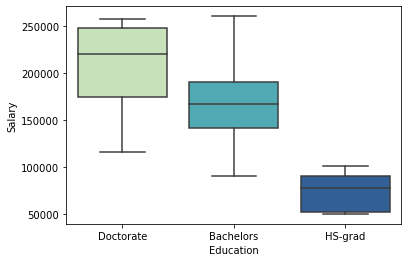

In [17]:
# Analysis of different education level on salary using a boxplot

sns.boxplot(x = 'Education', y='Salary', data=df, palette='YlGnBu')

In [18]:
# As per the boxplot of 3 levels of education, it can be interprted that Education lelel has  has signigicant impact on the Salary.
# Let us perform a one way Anova to confirm the same

In [19]:
# The null and and alternate hypothesis for One way Anova of effect of Education on Salary is given below :
# Null Hypothesis, Ho = There are no effect of Education on Salary, mean of Salaries at different Education levels are same
# Alternate Hypothesis, Ha = There is an effect of Education on Salary, mean of Salaries is different for at least one Education level

In [20]:
formula = 'Salary ~ C(Education)'
model = ols(formula,df).fit()
aov_table = anova_lm(model, typ=1)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.00000,"102,695,466,735.88608","51,347,733,367.94304",30.95628,0.00000
Residual,37.00000,"61,372,559,274.48890","1,658,717,818.22943",NaN,NaN


In [21]:
ss.f.ppf(q=1-0.05, dfn=2, dfd=37)

3.251923846387207

In [22]:
# The pvalue < 0.05, and also F-Stat is higher and F-Critical, hence we can reject the Null hypotheis. Therefore the Alternate Hypothesis stands true that there 
# is an effect of Education on Salary

#### 3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

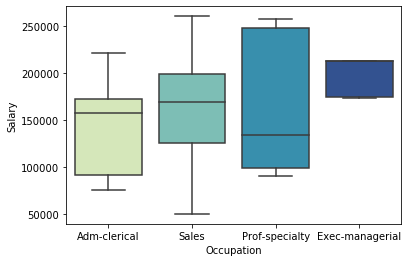

In [23]:
# Analysis of different Occupation level on salary using a boxplot

sns.boxplot(x = 'Occupation', y='Salary', data=df, palette='YlGnBu')

In [24]:
# As per the boxplot of 4 levels of Occupation, it can be interprted that Occupation lelel has varying effect on the Salary.
# Let us perform a one way Anova to determine if Occupation significantly influence the Salary

In [25]:
# The null and alternate hypothesis for One way Anova of effect of Occupation on Salary is given below :
# Null Hypothesis, Ho = There are no effect of Occupation on Salary, mean of Salaries at different Occupation levels are same
# Alternate Hypothesis, Ha = There is an effect of Occupation on Salary, mean of Salaries is different for at least one Occupation level

In [26]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula,df).fit()
aov_table = anova_lm(model, typ=1)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.00000,"11,258,782,926.46606","3,752,927,642.15535",0.88414,0.45851
Residual,36.00000,"152,809,243,083.90900","4,244,701,196.77525",NaN,NaN


In [27]:
ss.f.ppf(q=1-0.05, dfn=3, dfd=36)

2.86626555094018

In [28]:
# As per the one way Anova, we see that pvalue > 0.05 and also the f-stat is less than f-critical. Therefore we fail to reject the Null Hypothesis. 
# Hence, there are no effect of Occupation on Salary

#### 4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result.

In [29]:
# As we have seen Null Hypotheis is rejected in Question No. 2 above where Education seems to have significant impact on Salary
# In order to verify which class means are significantly different, we can use the Tukey-HSD test.

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['Salary'], groups=df['Education'], alpha=0.05)
print(m_comp)


          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1    group2    meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------------
Bachelors Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
Bachelors   HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
Doctorate   HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-----------------------------------------------------------------------


In [31]:
# As seen from the Tukey HSD test all the 3 pairs have pvalue<0.05 which means that the difference in their
# means are statistically significant

#### Problem 1B:
#### 1.What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

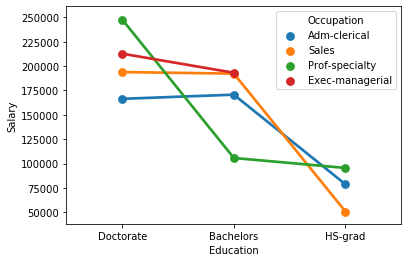

In [32]:
# To check the interaction of 2 factors - Education and Occupation, we are plotting the pointplot

sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation', ci = False)

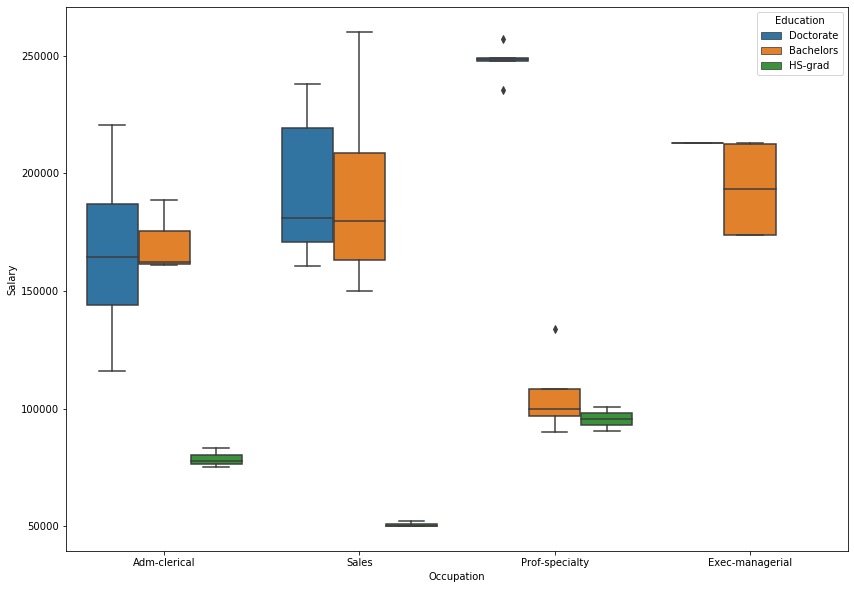

In [33]:
plt.figure(figsize=(14,10))
sns.boxplot(x=df['Occupation'], y=df['Salary'], hue = df['Education'])

In [34]:
# There is an interaction between the 2 factors. Different level of Education 
# behaves differently across different Occupation level in terms of Salary. There is a iteraction 
# between Education - HS Grad and Occupation - Adm-Clerical

#### 2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

In [35]:
# The null and alternate hypothesis for 2 way Anova of effect of Occupation and Education on Salary is given below :
# Null Hypothesis, Ho = There are no effect of Occupation and/or Education on Salary, mean of 
# Salaries at different factor levels are same

# Alternate Hypothesis, Ha = There is an effect of Occupation and/or Education on Salary, 
# mean of Salaries is different for at least one factor

In [36]:
# Performing the 2 way Anova

formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ = 3) # typ = 3 is inserted because interaction is considered here.
(aov_table)

,sum_sq,df,F,PR(>F)
Intercept,"87,426,736,562.99998",1.00000,122.95101,0.00000
C(Education),"16,860,395,678.68333",2.00000,11.85566,0.00017
C(Occupation),"20,284,536,548.68333",3.00000,9.50893,0.00016
C(Education):C(Occupation),"42,277,911,261.71355",6.00000,9.90946,0.00001
Residual,"20,621,020,503.03333",29.00000,NaN,NaN


In [37]:
# As seen from the Anova table, Education, Occupation and Interaction between Education and Occupation has a significant effect on Salary. Pvalue of Education, Occupation and
# interaction between Education and Occupation is less than Significant Level
# Therefore we can reject the Null hypothesis

#### 3. Explain the business implications of performing ANOVA for this particular case study.

In [ ]:
# The answer is provided in the Business report

#### Problem 2:
The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

#### 1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [38]:
#importing the Dataset
path = os.getcwd()
file ='Education+-+Post+12th+Standard.csv'
df1=pd.read_csv(os.path.join(path,file))
df1.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10000,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20000,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90000,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70000,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90000,2,10922,15


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [40]:
# Data Pre-processing
# Checking for Bad values

In [41]:
df1.isin(['?']).sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [42]:
# There are no bad value and the datatype is also showing correctly in the info table

In [43]:
# Treating anomalies


In [44]:
df_stat=df1.select_dtypes(include=['int64','float64']).describe().T
df_stat['Range']=df_stat['max']-df_stat['min']
df_stat

,count,mean,std,min,25%,50%,75%,max,Range
Apps,777.00000,"3,001.63835","3,870.20148",81.00000,776.00000,"1,558.00000","3,624.00000","48,094.00000","48,013.00000"
Accept,777.00000,"2,018.80438","2,451.11397",72.00000,604.00000,"1,110.00000","2,424.00000","26,330.00000","26,258.00000"
Enroll,777.00000,779.97297,929.17619,35.00000,242.00000,434.00000,902.00000,"6,392.00000","6,357.00000"
Top10perc,777.00000,27.55856,17.64036,1.00000,15.00000,23.00000,35.00000,96.00000,95.00000
Top25perc,777.00000,55.79665,19.80478,9.00000,41.00000,54.00000,69.00000,100.00000,91.00000
F.Undergrad,777.00000,"3,699.90734","4,850.42053",139.00000,992.00000,"1,707.00000","4,005.00000","31,643.00000","31,504.00000"
P.Undergrad,777.00000,855.29858,"1,522.43189",1.00000,95.00000,353.00000,967.00000,"21,836.00000","21,835.00000"
Outstate,777.00000,"10,440.66924","4,023.01648","2,340.00000","7,320.00000","9,990.00000","12,925.00000","21,700.00000","19,360.00000"
Room.Board,777.00000,"4,357.52638","1,096.69642","1,780.00000","3,597.00000","4,200.00000","5,050.00000","8,124.00000","6,344.00000"
Books,777.00000,549.38095,165.10536,96.00000,470.00000,500.00000,600.00000,"2,340.00000","2,244.00000"


In [45]:
# No as such anomalies/negative values observed

In [46]:
# Checking for Missing values

In [47]:
df1.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [48]:
# No null values found in the dataset

In [49]:
# Checking for duplicate values.

In [50]:
df1[df1.duplicated()]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [51]:
# No duplicate values.

In [52]:
# Data Visualization
# Starting with Univariate analysis

In [53]:
df_num=df1.select_dtypes(include=['int64','float64'])
df_num.shape[1]

17

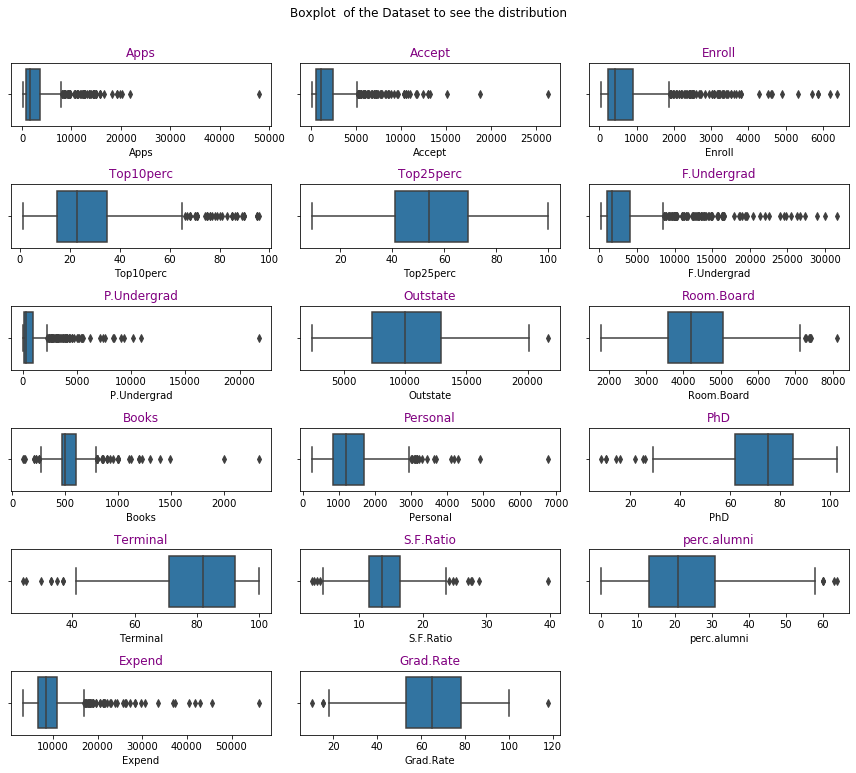

In [54]:
fig=plt.figure(figsize=(12,20))
fig.suptitle('Boxplot  of the Dataset to see the distribution', y=1.02)
for i in range(0,df_num.shape[1]):
    ax=fig.add_subplot(12,3, i+1)
    sns.boxplot(df_num[df_num.columns[i]])
    ax.set_title(df_num.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

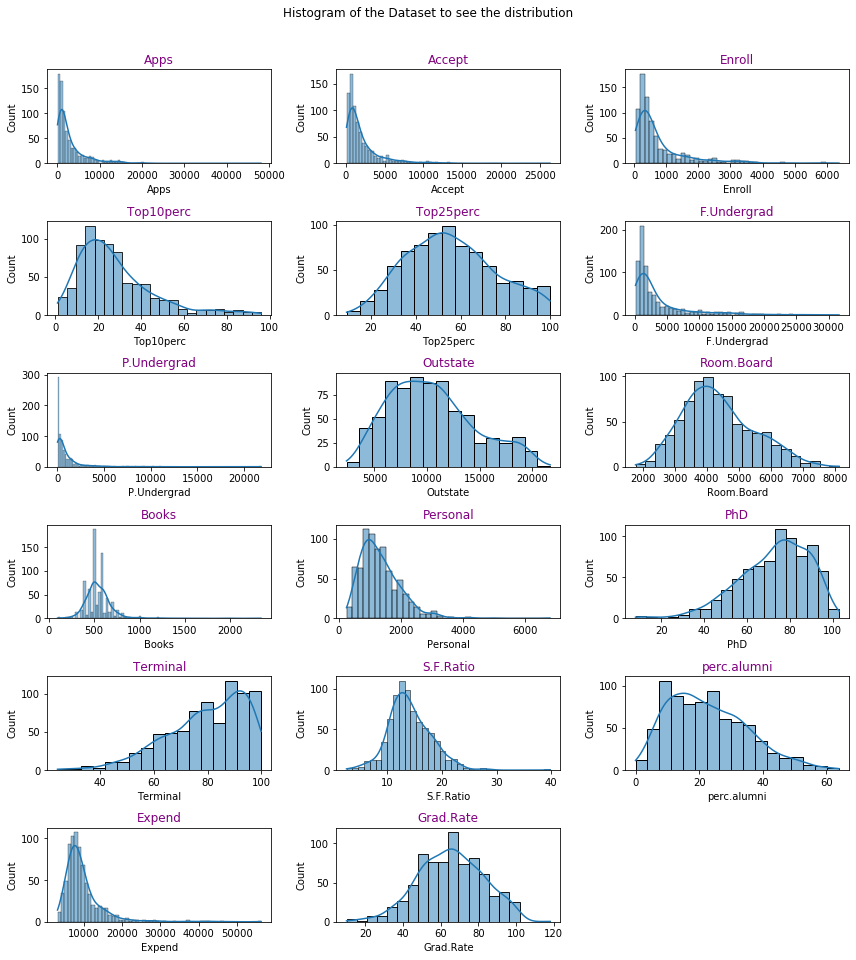

In [55]:
fig=plt.figure(figsize=(12,25))
fig.suptitle('Histogram of the Dataset to see the distribution', y=1.02)
for i in range(0,df_num.shape[1]):
    ax=fig.add_subplot(12,3, i+1)
    
    sns.histplot(df_num[df_num.columns[i]], kde=True)
    ax.set_title(df_num.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [56]:
for i in range(0,df_num.shape[1]):
    print(f'Skewness for {df_num.columns[i]}  : {df_num.iloc[i].skew()}')
    print(f'Kurtosis for {df_num.columns[i]}  : {df_num.iloc[i].kurtosis()}')

Skewness for Apps  : 1.7775076653868174
Kurtosis for Apps  : 2.391651401651522
Skewness for Accept  : 1.9496640216507601
Kurtosis for Accept  : 2.8753434411727787
Skewness for Enroll  : 2.3545104611708805
Kurtosis for Enroll  : 4.803019753038615
Skewness for Top10perc  : 2.569167223036085
Kurtosis for Top10perc  : 6.026343337832568
Skewness for Top25perc  : 2.370148451598896
Kurtosis for Top25perc  : 5.0718623423671545
Skewness for F.Undergrad  : 2.5766673171892727
Kurtosis for F.Undergrad  : 5.935403220063577
Skewness for P.Undergrad  : 2.3472068929903234
Kurtosis for P.Undergrad  : 4.920475926791463
Skewness for Outstate  : 2.2961671189123045
Kurtosis for Outstate  : 4.4105694719337585
Skewness for Room.Board  : 2.502206054965531
Kurtosis for Room.Board  : 5.4928487835401985
Skewness for Books  : 2.32742494044273
Kurtosis for Books  : 4.465037749000052
Skewness for Personal  : 2.4865657470877465
Kurtosis for Personal  : 5.815716349423424
Skewness for PhD  : 2.511270877503425
Kurtosis

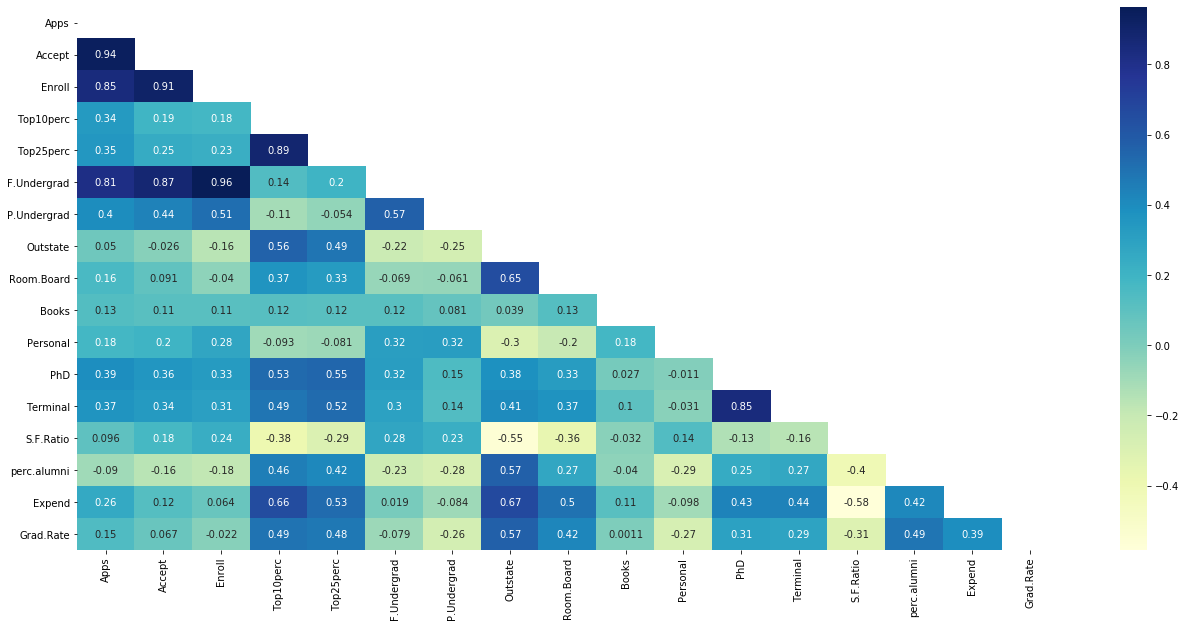

In [57]:
# Performing the Multivariate analysis

# Understanding the correlation using Heatmap

mask= np.triu(np.ones_like(df_num.corr(), dtype=np.bool)) 
plt.figure(figsize=(22, 10))
sns.heatmap(df_num.corr(), annot=True, cmap='YlGnBu', mask=mask)



In [58]:
# Selecting the Variables with highest correlations and plotting a pairplot

df_num_corr=pd.DataFrame(df_num.corr().unstack().sort_values(ascending=False))
df_num_corr.reset_index(inplace=True)
df_num_corr.head()

,level_0,level_1,0
0,Apps,Apps,1.00000
1,Accept,Accept,1.00000
2,Expend,Expend,1.00000
3,perc.alumni,perc.alumni,1.00000
4,S.F.Ratio,S.F.Ratio,1.00000


In [59]:
# Renaming colums

df_num_corr.rename(columns={'level_0':"Var1","level_1":'Var2',0:'Corr.Coeff'}, inplace=True)

In [60]:
df_num_corr.head()

,Var1,Var2,Corr.Coeff
0,Apps,Apps,1.00000
1,Accept,Accept,1.00000
2,Expend,Expend,1.00000
3,perc.alumni,perc.alumni,1.00000
4,S.F.Ratio,S.F.Ratio,1.00000


In [61]:
# Adding a column "Correlated pair" to identify the similar variable and mirror columns

df_num_corr['Correlated pair'] = df_num_corr.apply(lambda x: '-'.join(sorted([x['Var1'],x['Var2']])),axis=1)
df_num_corr.head(3)

,Var1,Var2,Corr.Coeff,Correlated pair
0,Apps,Apps,1.00000,Apps-Apps
1,Accept,Accept,1.00000,Accept-Accept
2,Expend,Expend,1.00000,Expend-Expend


In [62]:
# Dropping the repeated coumns and Redundant col

df_num_corr = df_num_corr[df_num_corr['Var1']!=df_num_corr['Var2']]
df_num_corr

,Var1,Var2,Corr.Coeff,Correlated pair
17,F.Undergrad,Enroll,0.96464,Enroll-F.Undergrad
18,Enroll,F.Undergrad,0.96464,Enroll-F.Undergrad
19,Accept,Apps,0.94345,Accept-Apps
20,Apps,Accept,0.94345,Accept-Apps
21,Accept,Enroll,0.91164,Accept-Enroll
...,...,...,...,...
284,S.F.Ratio,perc.alumni,-0.40293,S.F.Ratio-perc.alumni
285,Outstate,S.F.Ratio,-0.55482,Outstate-S.F.Ratio
286,S.F.Ratio,Outstate,-0.55482,Outstate-S.F.Ratio
287,Expend,S.F.Ratio,-0.58383,Expend-S.F.Ratio


In [63]:
df_num_corr=df_num_corr.drop_duplicates(['Correlated pair'])
df_num_corr['Corr.Coeff']=df_num_corr['Corr.Coeff'].abs()
df_num_corr = df_num_corr.sort_values(by='Corr.Coeff', ascending=False)
df_num_corr = df_num_corr [df_num_corr['Corr.Coeff']>0.80]

df_num_corr # The correlations with more than 0.80 coeff. of correlation

,Var1,Var2,Corr.Coeff,Correlated pair
17,F.Undergrad,Enroll,0.96464,Enroll-F.Undergrad
19,Accept,Apps,0.94345,Accept-Apps
21,Accept,Enroll,0.91164,Accept-Enroll
23,Top25perc,Top10perc,0.89199,Top10perc-Top25perc
25,F.Undergrad,Accept,0.87422,Accept-F.Undergrad
27,Terminal,PhD,0.84959,PhD-Terminal
29,Apps,Enroll,0.84682,Apps-Enroll
31,F.Undergrad,Apps,0.81449,Apps-F.Undergrad


<Figure size 1080x1080 with 0 Axes>

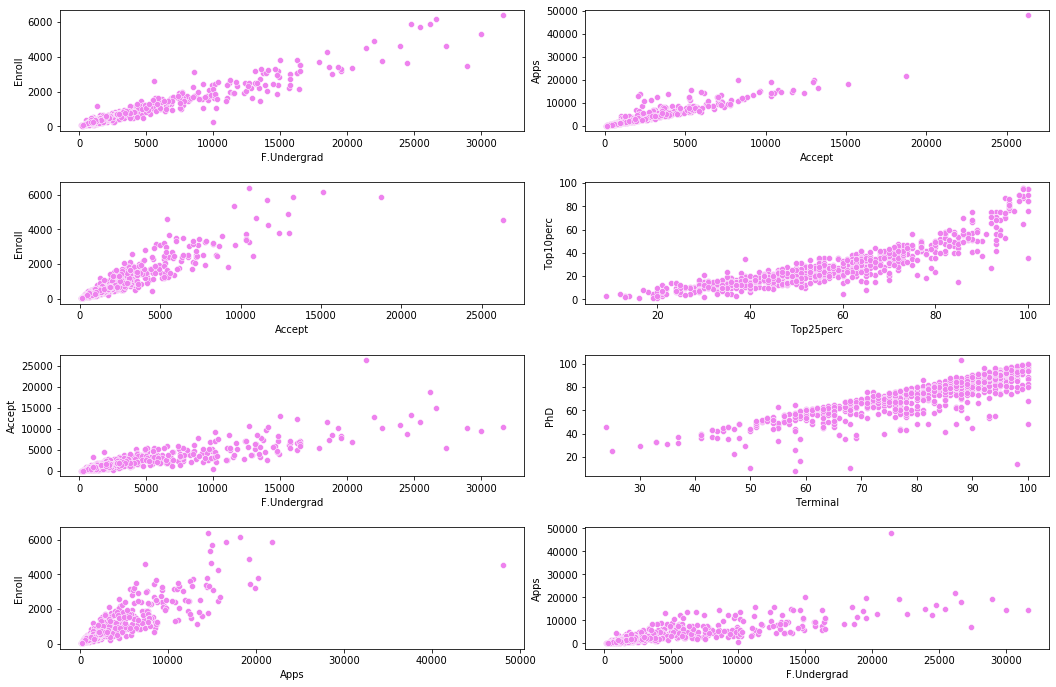

In [64]:
fig=plt.figure(figsize=(15,15))
fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharey=False, sharex=False)
fig.tight_layout(pad=3.0)
sns.scatterplot(ax = axes[0, 0], x= 'F.Undergrad', y='Enroll', color = 'violet',data = df_num)

sns.scatterplot(ax = axes[0, 1], x= 'Accept', y='Apps', color = 'violet',data = df_num)

sns.scatterplot(ax = axes[1, 0], x= 'Accept', y='Enroll', color = 'violet',data = df_num)

sns.scatterplot(ax = axes[1, 1], x= 'Top25perc', y='Top10perc', color = 'violet',data = df_num)

sns.scatterplot(ax = axes[2, 0], x= 'F.Undergrad', y='Accept', color = 'violet',data = df_num)

sns.scatterplot(ax = axes[2, 1], x= 'Terminal', y='PhD', color = 'violet',data = df_num)

sns.scatterplot(ax = axes[3, 0], x= 'Apps', y='Enroll', color = 'violet',data = df_num)

sns.scatterplot(ax = axes[3, 1], x= 'F.Undergrad', y='Apps', color = 'violet',data = df_num)


In [65]:
# Insights drawn from the EDA
# From univariate analysis, we see that the variables Apps, Accept, Enroll, Top10perc, F.undergrad are highly right skewed. Most of the values are in the
# last quarter of the dataset
# Also, the variables PhD and Terminal are left skewed
# From Multivariable analyisis, we see that below combination of variables are positively correlated to each other.

# Enroll	F.Undergrad
# Accept	Apps
# Accept	Enroll
# Top25perc	Top10perc
# F.Undergrad	Accept
# Terminal	PhD
# Apps	Enroll
# F.Undergrad	Apps



#### 2. Is scaling necessary for PCA in this case? Give justification and perform scaling.


In [66]:
# The dataset has a high variations, for exp. there is a huge difference between max. value of Apps received and perc.alumni
# Therefore Scaling is necessary to normalize the data set.
# Scaling for PCA is done usin Z Score.

df_num


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10000,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20000,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90000,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70000,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90000,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.00000,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.30000,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.40000,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.80000,49,40386,99


In [67]:
df_num_scaled=round(df_num.apply(ss.zscore),2)

In [68]:
df_num_scaled.head(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.35000,-0.32000,-0.06000,-0.26000,-0.19000,-0.17000,-0.21000,-0.75000,-0.96000,-0.60000,1.27000,-0.16000,-0.12000,1.01000,-0.87000,-0.50000,-0.32000
1,-0.21000,-0.04000,-0.29000,-0.66000,-1.35000,-0.21000,0.24000,0.46000,1.91000,1.22000,0.24000,-2.68000,-3.38000,-0.48000,-0.54000,0.17000,-0.55000
2,-0.41000,-0.38000,-0.48000,-0.32000,-0.29000,-0.55000,-0.50000,0.20000,-0.55000,-0.91000,-0.26000,-1.20000,-0.93000,-0.30000,0.59000,-0.18000,-0.67000
3,-0.67000,-0.68000,-0.69000,1.84000,1.68000,-0.66000,-0.52000,0.63000,1.00000,-0.60000,-0.69000,1.19000,1.18000,-1.62000,1.15000,1.79000,-0.38000
4,-0.73000,-0.76000,-0.78000,-0.66000,-0.60000,-0.71000,0.01000,-0.72000,-0.22000,1.52000,0.24000,0.20000,-0.52000,-0.55000,-1.68000,0.24000,-2.94000


In [69]:
df_scaled_stat = df_num_scaled.describe().T

df_scaled_stat['Range'] =df_scaled_stat['max'] - df_scaled_stat['min']
df_scaled_stat

,count,mean,std,min,25%,50%,75%,max,Range
Apps,777.00000,0.00015,1.00064,-0.76000,-0.58000,-0.37000,0.16000,11.66000,12.42000
Accept,777.00000,-0.00023,1.00046,-0.79000,-0.58000,-0.37000,0.17000,9.92000,10.71000
Enroll,777.00000,-0.00010,1.00068,-0.80000,-0.58000,-0.37000,0.13000,6.04000,6.84000
Top10perc,777.00000,-0.00042,1.00096,-1.51000,-0.71000,-0.26000,0.42000,3.88000,5.39000
Top25perc,777.00000,0.00026,1.00043,-2.36000,-0.75000,-0.09000,0.67000,2.23000,4.59000
F.Undergrad,777.00000,-0.00005,1.00061,-0.73000,-0.56000,-0.41000,0.06000,5.76000,6.49000
P.Undergrad,777.00000,0.00018,1.00073,-0.56000,-0.50000,-0.33000,0.07000,13.79000,14.35000
Outstate,777.00000,-0.00024,1.00077,-2.01000,-0.78000,-0.11000,0.62000,2.80000,4.81000
Room.Board,777.00000,0.00013,1.00042,-2.35000,-0.69000,-0.14000,0.63000,3.44000,5.79000
Books,777.00000,-0.00022,1.00101,-2.75000,-0.48000,-0.30000,0.31000,10.85000,13.60000


In [70]:
df_num_scaled.shape

(777, 17)

In [71]:
import warnings
warnings.filterwarnings('ignore')

#### 3. Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

In [72]:
# lets create the covariance matrix


In [73]:
pd.options.display.float_format = "{:,.3f}".format
from sklearn.decomposition import PCA
pca=PCA(n_components=17, random_state=123)
pca.fit_transform(df_num_scaled)
pca.get_covariance()
df_cov_maxtrix=pd.DataFrame(pca.get_covariance(), columns=df_num_scaled.columns, index=df_num_scaled.columns)
df_cov_maxtrix

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001,0.944,0.848,0.339,0.352,0.815,0.399,0.050,0.165,0.133,0.179,0.391,0.370,0.096,-0.090,0.260,0.147
Accept,0.944,1.001,0.913,0.193,0.248,0.875,0.442,-0.026,0.091,0.114,0.201,0.356,0.338,0.177,-0.160,0.125,0.067
Enroll,0.848,0.913,1.001,0.182,0.227,0.966,0.514,-0.156,-0.040,0.113,0.281,0.332,0.309,0.238,-0.181,0.064,-0.022
Top10perc,0.339,0.193,0.182,1.002,0.893,0.141,-0.105,0.563,0.372,0.119,-0.094,0.533,0.492,-0.385,0.456,0.662,0.496
Top25perc,0.352,0.248,0.227,0.893,1.001,0.200,-0.054,0.490,0.332,0.116,-0.081,0.546,0.525,-0.295,0.418,0.528,0.478
F.Undergrad,0.815,0.875,0.966,0.141,0.200,1.001,0.571,-0.216,-0.069,0.116,0.317,0.319,0.301,0.280,-0.230,0.019,-0.079
P.Undergrad,0.399,0.442,0.514,-0.105,-0.054,0.571,1.001,-0.254,-0.062,0.081,0.320,0.149,0.142,0.233,-0.281,-0.083,-0.257
Outstate,0.050,-0.026,-0.156,0.563,0.490,-0.216,-0.254,1.002,0.655,0.039,-0.300,0.383,0.409,-0.556,0.567,0.674,0.572
Room.Board,0.165,0.091,-0.040,0.372,0.332,-0.069,-0.062,0.655,1.001,0.128,-0.200,0.329,0.375,-0.363,0.273,0.502,0.425
Books,0.133,0.114,0.113,0.119,0.116,0.116,0.081,0.039,0.128,1.002,0.180,0.027,0.100,-0.032,-0.040,0.113,0.001


In [74]:
# Comparing with the Correlation matrix.
pd.options.display.float_format = "{:,.3f}".format
df_num_scaled.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000,0.943,0.847,0.339,0.351,0.814,0.398,0.050,0.165,0.133,0.179,0.391,0.370,0.096,-0.090,0.260,0.147
Accept,0.943,1.000,0.912,0.192,0.247,0.874,0.441,-0.026,0.091,0.114,0.201,0.356,0.338,0.176,-0.160,0.125,0.067
Enroll,0.847,0.912,1.000,0.181,0.227,0.965,0.513,-0.156,-0.040,0.113,0.281,0.332,0.308,0.237,-0.181,0.064,-0.022
Top10perc,0.339,0.192,0.181,1.000,0.892,0.141,-0.105,0.562,0.371,0.119,-0.093,0.532,0.491,-0.385,0.455,0.661,0.495
Top25perc,0.351,0.247,0.227,0.892,1.000,0.199,-0.054,0.489,0.331,0.115,-0.081,0.546,0.525,-0.294,0.418,0.527,0.477
F.Undergrad,0.814,0.874,0.965,0.141,0.199,1.000,0.571,-0.216,-0.069,0.115,0.317,0.318,0.300,0.280,-0.230,0.019,-0.079
P.Undergrad,0.398,0.441,0.513,-0.105,-0.054,0.571,1.000,-0.254,-0.061,0.081,0.320,0.149,0.142,0.233,-0.281,-0.083,-0.257
Outstate,0.050,-0.026,-0.156,0.562,0.489,-0.216,-0.254,1.000,0.654,0.039,-0.299,0.383,0.408,-0.555,0.566,0.673,0.571
Room.Board,0.165,0.091,-0.040,0.371,0.331,-0.069,-0.061,0.654,1.000,0.128,-0.200,0.329,0.374,-0.363,0.272,0.502,0.425
Books,0.133,0.114,0.113,0.119,0.115,0.115,0.081,0.039,0.128,1.000,0.179,0.027,0.100,-0.032,-0.040,0.112,0.001


In [75]:
# There seems no difference in Covariance and Correlation matrix. This is because Covariance is calculated on a normalize ddta

#### 4. Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

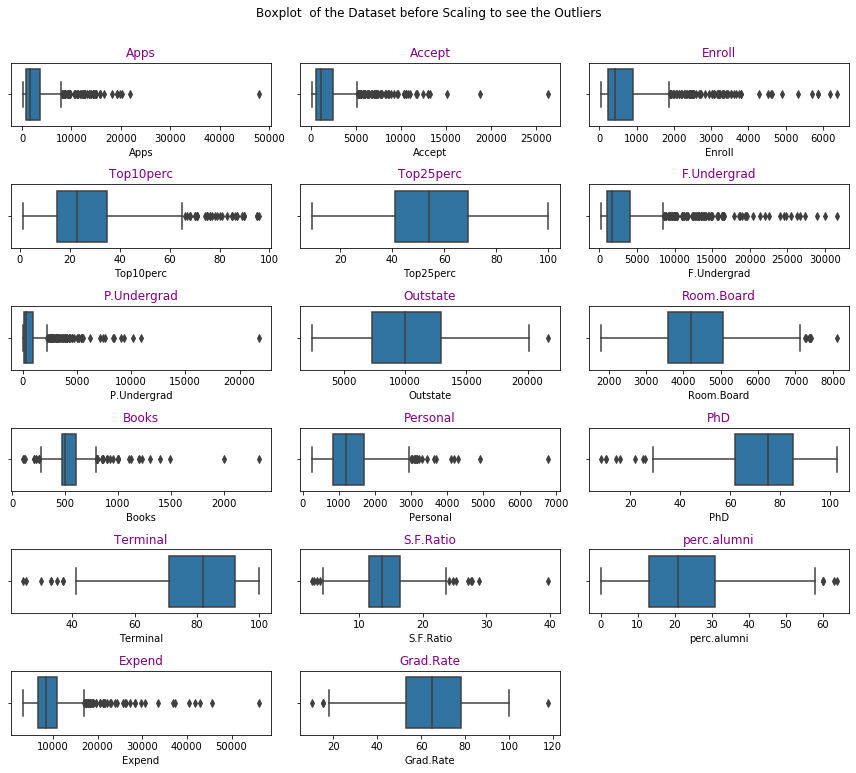

In [76]:
# Checking outlier before scaling

fig=plt.figure(figsize=(12,20))
fig.suptitle('Boxplot  of the Dataset before Scaling to see the Outliers', y=1.02)
for i in range(0,df_num.shape[1]):
    ax=fig.add_subplot(12,3, i+1)
    sns.boxplot(df_num[df_num.columns[i]])
    ax.set_title(df_num.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

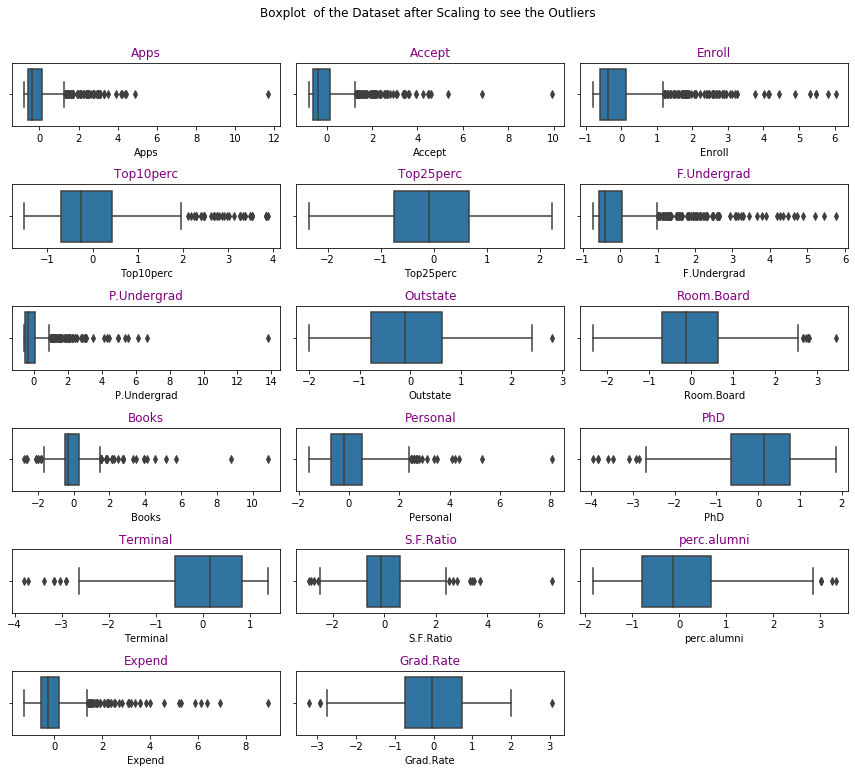

In [77]:
# Checking outlier after scaling

fig=plt.figure(figsize=(12,20))
fig.suptitle('Boxplot  of the Dataset after Scaling to see the Outliers', y=1.02)
for i in range(0,df_num_scaled.shape[1]):
    ax=fig.add_subplot(12,3, i+1)
    sns.boxplot(df_num_scaled[df_num_scaled.columns[i]])
    ax.set_title(df_num_scaled.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [78]:
# As we can see the Outliers dispersion from the max/min value has reduced drastically after the scaling action. Thus Scaling helped to shrink the 
# range of data and pulled the oulier nearer to the whiskers

#### 5. Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

In [79]:
# Checking for significant correations in  order to perfrom PCA
# Ho = Coorellation is not significant, Ha=Coorellation is significant
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
print(f'pvalue : {p_value}')

#Now checking if sample size is adequate using KMO model, above 0.7 is good, below 0.5 is not adequate
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_num_scaled)
print(f'kmo_model : {kmo_model}')


pvalue : 0.0
kmo_model : 0.8130239944152532


In [80]:
# As seen above, Correlation is significant as null hypothesis is rejected, and sample size is adequate for PCA

In [81]:
# Extracting the eigen values and eigenvectors using Sklearn

from sklearn.decomposition import PCA
pca=PCA(n_components=17, random_state=123)
pca_transformed=pca.fit_transform(df_num_scaled)
pca.components_ # Eigen Vectors

array([[ 2.48788398e-01,  2.07606565e-01,  1.76358977e-01,
         3.54408525e-01,  3.43838125e-01,  1.54682766e-01,
         2.65097695e-02,  2.94740190e-01,  2.48945290e-01,
         6.47673282e-02, -4.26159430e-02,  3.18338702e-01,
         3.17171880e-01, -1.76891230e-01,  2.05021303e-01,
         3.18868188e-01,  2.52282812e-01],
       [ 3.31555910e-01,  3.71979659e-01,  4.03738858e-01,
        -8.24708319e-02, -4.47909132e-02,  4.17640953e-01,
         3.15121308e-01, -2.49739660e-01, -1.37853968e-01,
         5.63557153e-02,  2.19879011e-01,  5.83051342e-02,
         4.64856835e-02,  2.46783830e-01, -2.46613227e-01,
        -1.31653700e-01, -1.69274546e-01],
       [-6.28297307e-02, -1.00947809e-01, -8.27579284e-02,
         3.51684638e-02, -2.37641571e-02, -6.13621099e-02,
         1.39216623e-01,  4.65456287e-02,  1.48735935e-01,
         6.78352887e-01,  4.99219738e-01, -1.27505663e-01,
        -6.65422783e-02, -2.89461037e-01, -1.46552385e-01,
         2.26500074e-01, -2.0

In [82]:
pca.explained_variance_  # Eigen values

array([5.44988102, 4.48359163, 1.17510429, 1.00839192, 0.93442969,
       0.84877313, 0.60570382, 0.58798602, 0.53068471, 0.40425939,
       0.31342972, 0.22061899, 0.16774326, 0.1438869 , 0.0880633 ,
       0.036736  , 0.02297395])

#### 6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [83]:
from sklearn.decomposition import PCA
pca=PCA(n_components=17, random_state=123)
pca_transformed=pca.fit_transform(df_num_scaled)
pca.components_ # Eigen Vectors

array([[ 2.48788398e-01,  2.07606565e-01,  1.76358977e-01,
         3.54408525e-01,  3.43838125e-01,  1.54682766e-01,
         2.65097695e-02,  2.94740190e-01,  2.48945290e-01,
         6.47673282e-02, -4.26159430e-02,  3.18338702e-01,
         3.17171880e-01, -1.76891230e-01,  2.05021303e-01,
         3.18868188e-01,  2.52282812e-01],
       [ 3.31555910e-01,  3.71979659e-01,  4.03738858e-01,
        -8.24708319e-02, -4.47909132e-02,  4.17640953e-01,
         3.15121308e-01, -2.49739660e-01, -1.37853968e-01,
         5.63557153e-02,  2.19879011e-01,  5.83051342e-02,
         4.64856835e-02,  2.46783830e-01, -2.46613227e-01,
        -1.31653700e-01, -1.69274546e-01],
       [-6.28297307e-02, -1.00947809e-01, -8.27579284e-02,
         3.51684638e-02, -2.37641571e-02, -6.13621099e-02,
         1.39216623e-01,  4.65456287e-02,  1.48735935e-01,
         6.78352887e-01,  4.99219738e-01, -1.27505663e-01,
        -6.65422783e-02, -2.89461037e-01, -1.46552385e-01,
         2.26500074e-01, -2.0

In [84]:
# Principal Components names
list_pc=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']
df_pca = pd.DataFrame(pca.components_,columns=list_pc,index=df_num_scaled.columns)
df_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Apps,0.249,0.208,0.176,0.354,0.344,0.155,0.027,0.295,0.249,0.065,-0.043,0.318,0.317,-0.177,0.205,0.319,0.252
Accept,0.332,0.372,0.404,-0.082,-0.045,0.418,0.315,-0.250,-0.138,0.056,0.220,0.058,0.046,0.247,-0.247,-0.132,-0.169
Enroll,-0.063,-0.101,-0.083,0.035,-0.024,-0.061,0.139,0.047,0.149,0.678,0.499,-0.128,-0.067,-0.289,-0.147,0.227,-0.208
Top10perc,0.282,0.268,0.162,-0.053,-0.111,0.100,-0.158,0.132,0.186,0.086,-0.231,-0.534,-0.519,-0.161,0.017,0.079,0.269
Top25perc,0.005,0.055,-0.056,-0.396,-0.427,-0.044,0.303,0.222,0.560,-0.127,-0.222,0.141,0.206,-0.080,-0.216,0.076,-0.110
F.Undergrad,-0.016,0.008,-0.043,-0.053,0.032,-0.043,-0.191,-0.030,0.163,0.640,-0.332,0.091,0.155,0.487,-0.047,-0.298,0.217
P.Undergrad,-0.043,-0.013,-0.027,-0.163,-0.120,-0.025,0.064,0.108,0.208,-0.148,0.633,-0.001,-0.027,0.218,0.248,-0.226,0.560
Outstate,-0.103,-0.056,0.059,-0.122,-0.102,0.079,0.570,0.009,-0.224,0.214,-0.236,-0.077,-0.012,-0.085,0.677,-0.053,-0.008
Room.Board,-0.091,-0.178,-0.128,0.340,0.403,-0.059,0.562,-0.004,0.276,-0.134,-0.094,-0.185,-0.255,0.275,-0.254,-0.049,0.044
Books,0.052,0.041,0.034,0.064,0.015,0.021,-0.222,0.187,0.298,-0.082,0.136,-0.124,-0.088,0.473,0.423,0.132,-0.590


#### 7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [85]:
# Creating the form of first PC with 2 places of decimals
pd.options.display.float_format = "{:,.2f}".format
round(df_pca['PC1'],2)

Apps           0.25
Accept         0.33
Enroll        -0.06
Top10perc      0.28
Top25perc      0.01
F.Undergrad   -0.02
P.Undergrad   -0.04
Outstate      -0.10
Room.Board    -0.09
Books          0.05
Personal       0.04
PhD            0.02
Terminal       0.60
S.F.Ratio      0.08
perc.alumni    0.13
Expend         0.46
Grad.Rate      0.36
Name: PC1, dtype: float64

#### The values of the variables is taken from the Scaled data
PC1 = O.25*Apps + 0.33*Accept - 0.06*Enroll +   0.28* Top10perc + 0.01*Top25perc -0.02*F.Undergrad - 0.04*P.Undergrad -0.10*Outstate -0.09*Room.Board + 0.05*Books + 0.04*Personal  + 0.02*PhD + 0.60* Terminal + 0.08*S.F.Ratio + 0.13*perc.alumni + 0.46*Expend + 0.36*Grad.Rate                                      

#### 8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [86]:
# Cumulative values of the eigen values
EigVal_ratio= np.round(pca.explained_variance_ratio_*100,2)
EigVal_ratio

array([32.02, 26.34,  6.9 ,  5.92,  5.49,  4.99,  3.56,  3.45,  3.12,
        2.37,  1.84,  1.3 ,  0.99,  0.85,  0.52,  0.22,  0.13])

In [87]:
# Cumulative sum and plotting the screeplot

cumsum=np.cumsum(EigVal_ratio)
cumsum

array([ 32.02,  58.36,  65.26,  71.18,  76.67,  81.66,  85.22,  88.67,
        91.79,  94.16,  96.  ,  97.3 ,  98.29,  99.14,  99.66,  99.88,
       100.01])

Text(0.5, 1.0, 'Scree Plot')

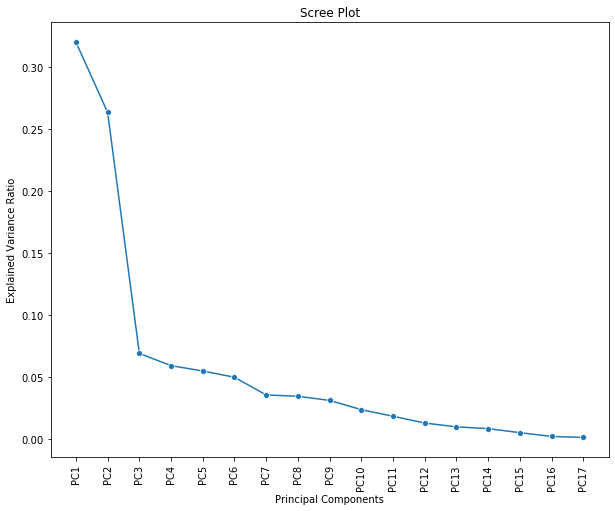

In [88]:
plt.figure(figsize=(10,8))
sns.lineplot(y=pca.explained_variance_ratio_,x=df_pca.columns, marker='o')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.xticks(rotation=90)
plt.title('Scree Plot')

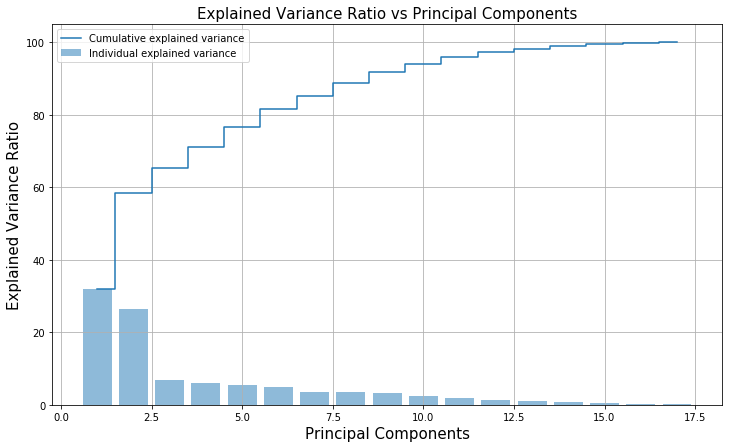

In [89]:
plt.figure(figsize=(12 ,7))
plt.bar(range(1, pca.explained_variance_.size + 1), EigVal_ratio, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_.size + 1), cumsum, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [90]:
# From the cumulative sum of Eigen value ratio as well as screeplot and pareto chart we see that the 
# first 6 Principal components contribute to 80% of the variations. This way we can select the optimum number of Pricipal components as per 
# Business requirement and reduce the dimensions.
# Eigen Vectors indicate the directions of the variables in each principal components and also the contributions of each variable under the
# Principal components

In [91]:
# Getting the PCA scores for 6 PCs
from sklearn.decomposition import PCA
pca=PCA(n_components=6, random_state=123)
pca_score=pca.fit_transform(df_num_scaled)
pca_score=pd.DataFrame(pca_score, columns=df_pca.columns[0:6])
pca_score.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.59,0.77,-0.10,-0.92,-0.74,-0.30
1,-2.19,-0.58,2.29,3.59,1.05,-0.18
2,-1.43,-1.10,-0.44,0.67,-0.37,-0.96
3,2.86,-2.63,0.14,-1.30,-0.18,-1.06
4,-2.22,0.03,2.39,-1.12,0.69,0.00


#### 9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [92]:

# Using the PCs the Ranking of the various colleges can be determined. Out of 17 PCs, the first 6 PCs contribute to 81% of the variations. 
# Thus the dimensional reduction is acheived.
# To interpret the 6 Principal Components contribution more than 80% of the variations, lets see the influence of each variable in the PCs.

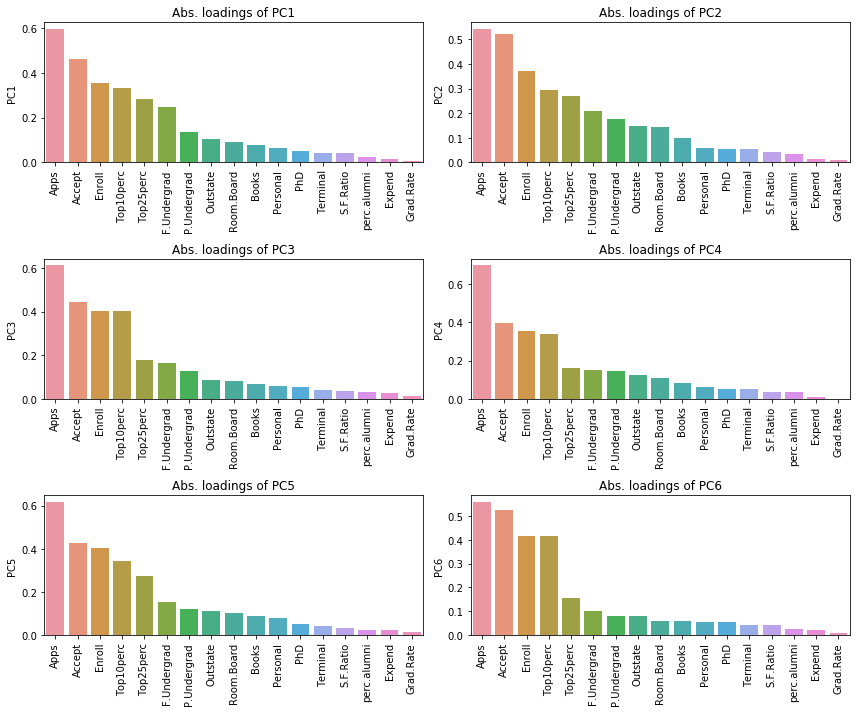

In [93]:
df_final_pcs=abs(df_pca.iloc[:,0:6])

plt.figure(figsize=(12,10))
for i in range(len(df_final_pcs.columns)):
    plt.subplot(3,2,i+1)
    sns.barplot(df_final_pcs.index, df_final_pcs[df_final_pcs.columns[i]].sort_values(ascending=False))
    plt.xticks(rotation=90)
    plt.title('Abs. loadings of {}'.format(df_final_pcs.columns[i]))
    plt.tight_layout()
    
